# Hypothesis of correlation project:

1. Strong relationship between budget and gross earnings   
2. Of the 3 groups of people (director, writer, star), star has the strongest correlation to gross earnings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
movie_df= pd.read_csv('movies.csv')

movie_df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Checking for missing data

In [13]:
movie_df.isnull().sum()

# large number of data from budget is missing

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Drop rows with missing values

In [15]:
movie_df= movie_df.dropna()
movie_df.isnull().sum()

# ensure rows have been dropped

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

Drop duplicates

In [18]:
movie_df.drop_duplicates()

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [19]:
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Filtering data after 2000

In [52]:
# i want data that is not so outdated so I will filter for data from year 2000 onwards

condition = movie_df['year'] >= 2000

filtered_df= movie_df[condition]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 3643 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      3169 non-null   object 
 1   rating    3169 non-null   object 
 2   genre     3169 non-null   object 
 3   year      3169 non-null   int64  
 4   released  3169 non-null   object 
 5   score     3169 non-null   float64
 6   votes     3169 non-null   float64
 7   director  3169 non-null   object 
 8   writer    3169 non-null   object 
 9   star      3169 non-null   object 
 10  country   3169 non-null   object 
 11  budget    3169 non-null   float64
 12  gross     3169 non-null   float64
 13  company   3169 non-null   object 
 14  runtime   3169 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 396.1+ KB


Sorting data in descending order 

In [53]:
filtered_df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
6908                                       Finding Dory         PG  Animation   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6905                                    The Jungle Book         PG  Adventure   
7051                     Jumanji: Welcome to the Jungle      PG-13     Action   
6455          The Hobbit: The Battle of the Five Armies      PG-13  Adventure   
5060           Pirates of the Caribbean: at World's End      PG-13     Action   
6

<AxesSubplot:xlabel='gross', ylabel='budget'>

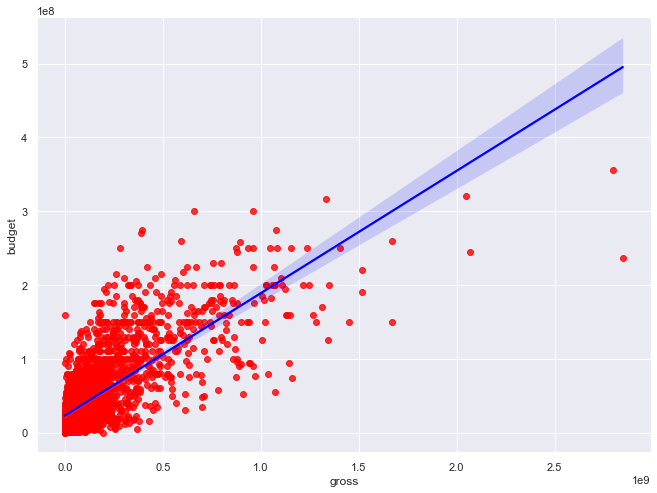

In [54]:
sns.set(rc={'figure.figsize':(11,8)})
sns.regplot(x="gross", y="budget", data=filtered_df, line_kws= {"color": "blue"}, scatter_kws= {"color": "red"})

In [34]:
filtered_df.corr() # 0.7544 correlation between budget and gross revenue 

year     score     votes    budget     gross   runtime
year     1.000000  0.089810  0.052324  0.103461  0.170891  0.089507
score    0.089810  1.000000  0.498950  0.087250  0.227653  0.433832
votes    0.052324  0.498950  1.000000  0.468046  0.628205  0.409081
budget   0.103461  0.087250  0.468046  1.000000  0.754425  0.352723
gross    0.170891  0.227653  0.628205  0.754425  1.000000  0.311452
runtime  0.089507  0.433832  0.409081  0.352723  0.311452  1.000000

Representing correlation in a heatmap

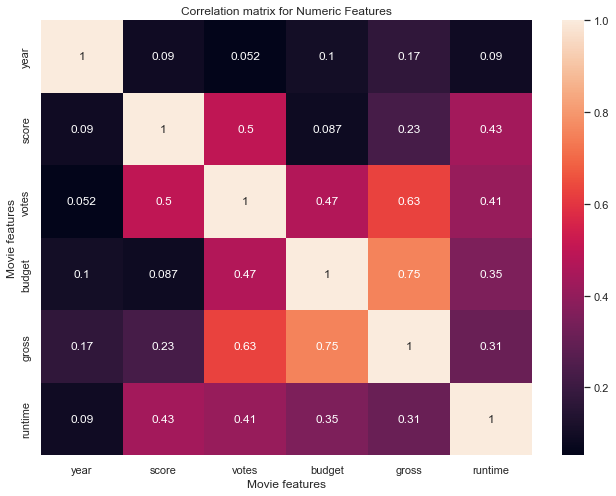

In [65]:

correlation_matrix= filtered_df.corr()
sns.heatmap(correlation_matrix, annot= True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

Converting non numerized columns into numerized to add to correlation matrix

In [49]:
df_numerized = filtered_df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
3643   148       5      1  2000      1393    7.9   260000.0       169     253   
3644   165       5      4  2000        21    7.6   514000.0       872     212   
3645   908       5      0  2000      1075    8.5  1400000.0      1105     429   
3647  1847       7      6  2000       276    8.3   786000.0       276     742   
3648  1457       5     10  2000      1037    8.4  1200000.0       222     326   
3650   449       4      1  2000       314    7.8   542000.0      1137    1937   
3651  1933       5      4  2000       706    6.2   238000.0       753    1717   
3652  2673       4      0  2000       827    6.4   160000.0      1402    1698   
3653   545       4      4  2000       233    5.7   108000.0       305     670   
3654  3113       4      0  2000       615    7.4   582000.0       163    1855   
3655  2065       4      0  2000       233    6.4    75000.0       232    1085   
3656  2667       5      0  2000       807    7.2   260000.0      1151    1610   
3657   736       5      3  2000       885    7.4   182000.0      1274    1796   
3658  2943       4      6  2000      1160    7.3   396000.0       830    1189   
3659   467       4      0  2000      1187    5.6   179000.0       887    1655   
3660  1870       5      4  2000      1005    6.4   161000.0      1330    1848   
3661  2248       5      1  2000       382    6.7   228000.0       270     942   
3662   393       4      4  2000       196    6.0    90000.0      1056     877   
3663  1840       3      3  2000      1420    7.8   202000.0       121     688   
3664  1501       4      0  2000      1032    6.1   322000.0       685     240   
3665  1622       4      1  2000       413    7.7   295000.0       634     735   
3666  2213       4      0  2000      1131    5.9   118000.0      1150     345   
3667   480       0      2  2000       784    7.0   181000.0      1048    1506   
3668  2304       5      5  2000       165    6.4    97000.0      1296    1230   
3669   794       5      9  2000       885    6.7   236000.0       556     671   
3670  2898       5      5  2000       572    7.6   199000.0      1274    1728   
3673  3048       4      6  2000       651    6.6   120000.0      1137     334   
3674  2379       0      2  2000       276    7.4   187000.0       851     309   
3675   562       4      0  2000       486    7.8   258000.0        62     745   
3676   923       4      0  2000       849    6.5   265000.0       354     706   
3677   691       4      4  2000       276    5.5   136000.0       273    1521   
3678  1452       4      4  2000      1326    7.0   317000.0       574     683   
3679  1739       5      0  2000       408    7.1   229000.0       319     890   
3680  1034       5      0  2000       233    5.8   126000.0      1024     632   
3681   904       2      6  2000       971    6.8    43000.0       651    1061   
3682  1490       4      0  2000       314    6.3   194000.0       363    1201   
3683  1023       5      4  2000       941    7.5   172000.0      1241    1424   
3684   272       4      0  2000       977    2.5    77000.0      1146     343   
3685  1945       5      9  2000       452    5.6   126000.0      1390    1103   
3686   303       4      4  2000      1270    7.5    58000.0       218     317   
3687  2839       5      4  2000       408    6.7   114000.0       708    1379   
3688   485       4      6  2000       518    7.2   181000.0       794     893   
3689   321       5      6  2000      1098    7.7   129000.0      1239    1143   
3690   170       5      6  2000        16    8.1   228000.0        23     694   
3691  1444       5      4  2000       784    6.6   226000.0       127    1500   
3692  2940       4      0  2000        57    6.6    79000.0       709    1005   
3693   286       4      4  2000      1270    6.0    99000.0       505    1497   
3694  2717       3      2  2000       941    6.9    88000.0       110    1817   
3696   633       3      2  2000      

In [55]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.020766  0.044165  0.005091 -0.021575  0.002018   
rating   -0.020766  1.000000  0.147960  0.030869  0.016050  0.071914   
genre     0.044165  0.147960  1.000000 -0.077117  0.018840 -0.003469   
year      0.005091  0.030869 -0.077117  1.000000 -0.016035  0.089810   
released -0.021575  0.016050  0.018840 -0.016035  1.000000  0.050865   
score     0.002018  0.071914 -0.003469  0.089810  0.050865  1.000000   
votes     0.006795  0.016501 -0.182017  0.052324  0.022639  0.498950   
director  0.015820  0.007888  0.027806 -0.042504 -0.004818 -0.030552   
writer    0.021314  0.009122  0.005511 -0.030599 -0.003805  0.002296   
star     -0.001335  0.042570 -0.000179  0.013447  0.034740 -0.010237   
country  -0.018578 -0.015017 -0.010742  0.003063 -0.021855 -0.045782   
budget    0.011582 -0.274521 -0.437935  0.103461  0.026667  0.087250   
gross    -0.005876 -0.227773 -0.287953  0.170891  0.003963  0.227653   
company   0.031040 -0.083734 -0.070970 -0.074644  0.018777  0.021623   
runtime   0.001806  0.122690 -0.110605  0.089507  0.011463  0.433832   

             votes  director    writer      star   country    budget  \
name      0.006795  0.015820  0.021314 -0.001335 -0.018578  0.011582   
rating    0.016501  0.007888  0.009122  0.042570 -0.015017 -0.274521   
genre    -0.182017  0.027806  0.005511 -0.000179 -0.010742 -0.437935   
year      0.052324 -0.042504 -0.030599  0.013447  0.003063  0.103461   
released  0.022639 -0.004818 -0.003805  0.034740 -0.021855  0.026667   
score     0.498950 -0.030552  0.002296 -0.010237 -0.045782  0.087250   
votes     1.000000 -0.037440 -0.015636 -0.023926  0.072590  0.468046   
director -0.037440  1.000000  0.271449  0.015578 -0.003590 -0.010956   
writer   -0.015636  0.271449  1.000000  0.015585  0.015992 -0.041049   
star     -0.023926  0.015578  0.015585  1.000000 -0.019899 -0.019002   
country   0.072590 -0.003590  0.015992 -0.019899  1.000000  0.091486   
budget    0.468046 -0.010956 -0.041049 -0.019002  0.091486  1.000000   
gross     0.628205 -0.044901 -0.038678 -0.000028  0.085568  0.754425   
company   0.142936 -0.004937 -0.018384  0.018199  0.021934  0.203871   
runtime   0.409081 -0.010323 -0.022778 -0.004143 -0.033836  0.352723   

             gross   company   runtime  
name     -0.005876  0.031040  0.001806  
rating   -0.227773 -0.083734  0.122690  
genre    -0.287953 -0.070970 -0.110605  
year      0.170891 -0.074644  0.089507  
released  0.003963  0.018777  0.011463  
score     0.227653  0.021623  0.433832  
votes     0.628205  0.142936  0.409081  
director -0.044901 -0.004937 -0.010323  
writer   -0.038678 -0.018384 -0.022778  
star     -0.000028  0.018199 -0.004143  
country   0.085568  0.021934 -0.033836  
budget    0.754425  0.203871  0.352723  
gross     1.000000  0.159316  0.311452  
company   0.159316  1.000000  0.064342  
runtime   0.311452  0.064342  1.000000

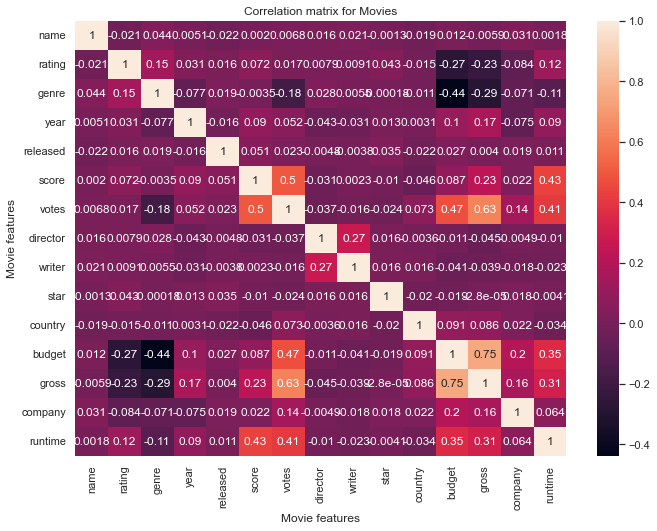

In [56]:
correlation_matrix= df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [61]:
corr_pairs = correlation_matrix.unstack()

print(corr_pairs)

name      name        1.000000
          rating     -0.020766
          genre       0.044165
          year        0.005091
          released   -0.021575
          score       0.002018
          votes       0.006795
          director    0.015820
          writer      0.021314
          star       -0.001335
          country    -0.018578
          budget      0.011582
          gross      -0.005876
          company     0.031040
          runtime     0.001806
rating    name       -0.020766
          rating      1.000000
          genre       0.147960
          year        0.030869
          released    0.016050
          score       0.071914
          votes       0.016501
          director    0.007888
          writer      0.009122
          star        0.042570
          country    -0.015017
          budget     -0.274521
          gross      -0.227773
          company    -0.083734
          runtime     0.122690
genre     name        0.044165
          rating      0.147960
        

In [62]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    genre      -0.437935
genre     budget     -0.437935
gross     genre      -0.287953
genre     gross      -0.287953
rating    budget     -0.274521
budget    rating     -0.274521
gross     rating     -0.227773
rating    gross      -0.227773
genre     votes      -0.182017
votes     genre      -0.182017
genre     runtime    -0.110605
runtime   genre      -0.110605
rating    company    -0.083734
company   rating     -0.083734
year      genre      -0.077117
genre     year       -0.077117
company   year       -0.074644
year      company    -0.074644
company   genre      -0.070970
genre     company    -0.070970
score     country    -0.045782
country   score      -0.045782
gross     director   -0.044901
director  gross      -0.044901
year      director   -0.042504
director  year       -0.042504
writer    budget     -0.041049
budget    writer     -0.041049
writer    gross      -0.038678
gross     writer     -0.038678
director  votes      -0.037440
votes     director   -0.037440
country 

In [64]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.4]
pd.set_option("display.max_rows", None, "display.max_columns", None)

display(strong_pairs)

budget    genre      -0.437935
genre     budget     -0.437935
votes     runtime     0.409081
runtime   votes       0.409081
          score       0.433832
score     runtime     0.433832
budget    votes       0.468046
votes     budget      0.468046
score     votes       0.498950
votes     score       0.498950
gross     votes       0.628205
votes     gross       0.628205
gross     budget      0.754425
budget    gross       0.754425
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# Conclusion:

1. Hypothesis 1 confirmed: strong correlation between budget and gross earnings 

2. Hypothesis 2 rejected: all 3 groups of people (writer, star, director) have little to no correlation to gross earnings